In [30]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Load data

In [3]:
# load data
boxes = pd.read_pickle("data/data_berlin_2019.pkl")

## Single sensors

#### first 7 sensors

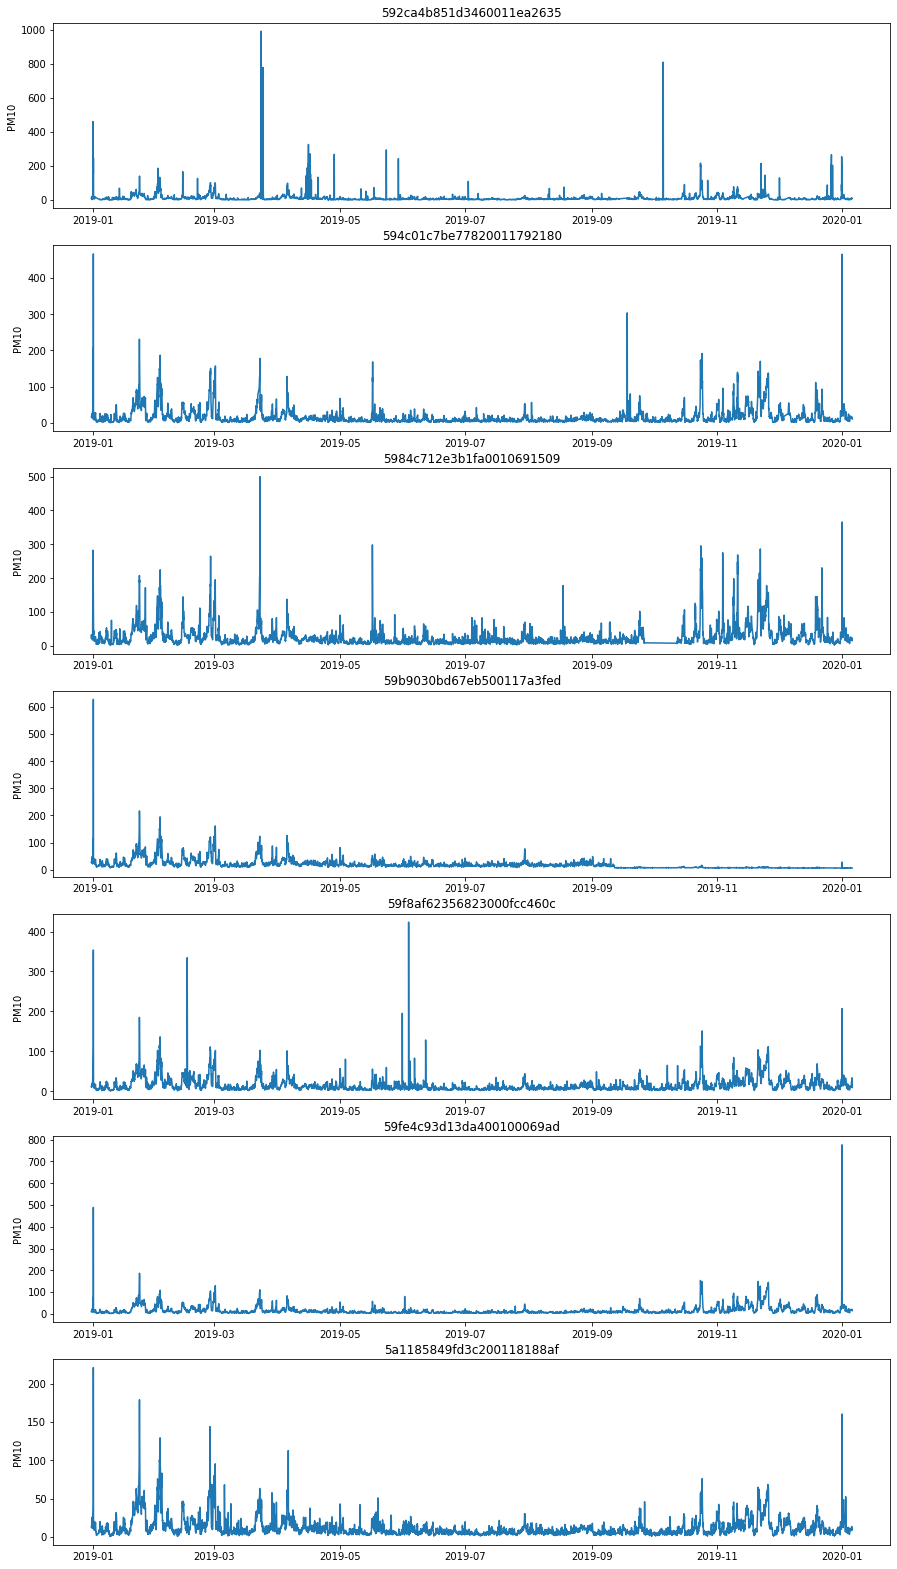

In [8]:


fig, ax = plt.subplots(7,figsize = (15,7*4));

plot_number = 0
for col in boxes.drop(columns = "date_time").iloc[:,:7].columns:

    sns.lineplot(data = boxes[["date_time",col]],
                 x="date_time",
                 y=col,
                 ax=ax[plot_number]);
    ax[plot_number].set(title = col,
                        xlabel = "",
                        ylabel = "PM10")
    plot_number += 1


#### second 7 sensors

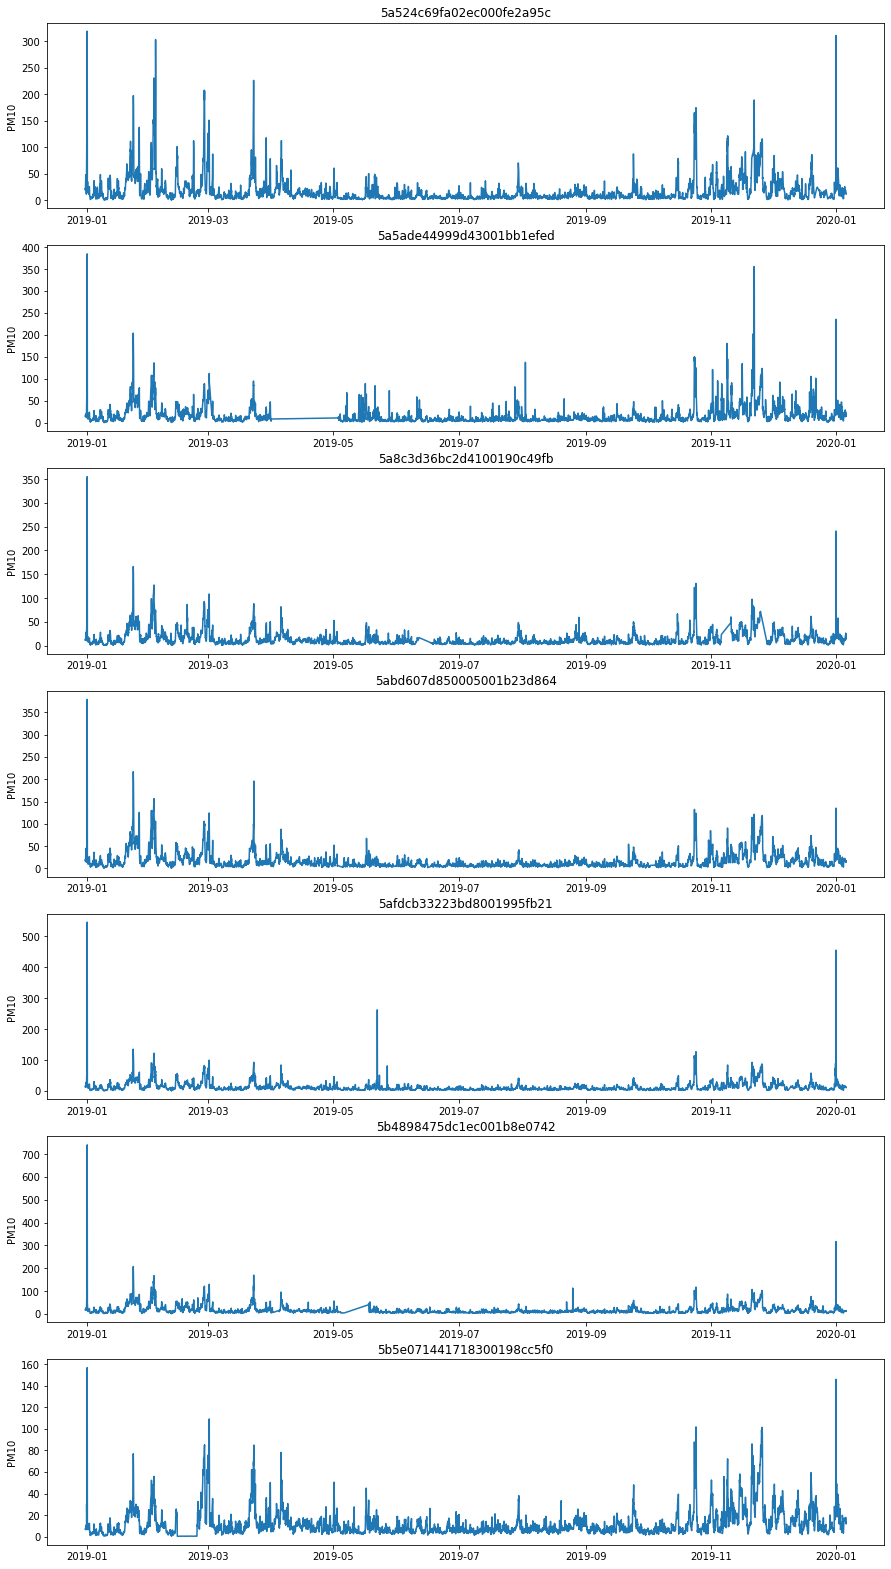

In [9]:
fig, ax = plt.subplots(7,1,figsize = (15,7*4));

plot_number = 0
for col in boxes.drop(columns = "date_time").iloc[:,7:14].columns:

    sns.lineplot(data = boxes[["date_time",col]],
                 x="date_time",
                 y=col,
                 ax=ax[plot_number]);
    ax[plot_number].set(title = col,
                        xlabel = "",
                        ylabel = "PM10")
    plot_number += 1


#### last 7 sensors

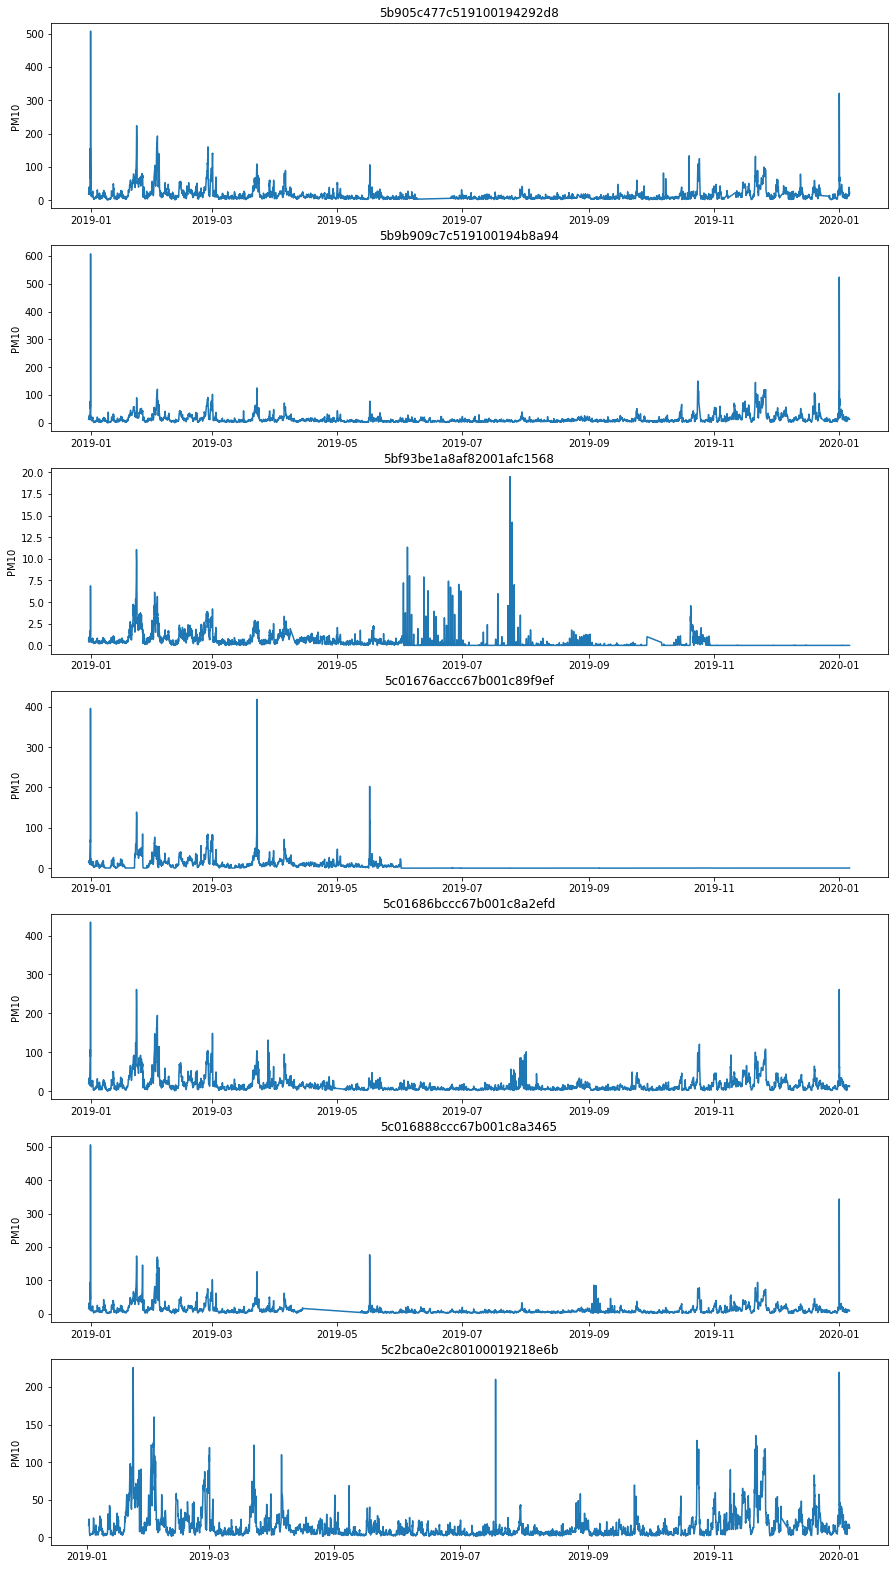

In [10]:
fig, ax = plt.subplots(7,1,figsize = (15,7*4));

plot_number = 0
for col in boxes.drop(columns = "date_time").iloc[:,14:21].columns:

    sns.lineplot(data = boxes[["date_time",col]],
                 x="date_time",
                 y=col,
                 ax=ax[plot_number]);
    ax[plot_number].set(title = col,
                        xlabel = "",
                        ylabel = "PM10")
    plot_number += 1

## Aggregated data

### Aggregate the data

In [5]:
agg = boxes.copy()

In [7]:
# drop sensors with too many missing data
sensors_2_drop = ['5a5ade44999d43001bb1efed','5bf93be1a8af82001afc1568','5c01676accc67b001c89f9ef']
agg = agg.drop(columns = sensors_2_drop)

In [8]:
agg["median"] = agg.drop(columns="date_time").median(axis=1)
agg["mean"] = agg.drop(columns=["date_time","median"]).median(axis=1)

### Plot mean

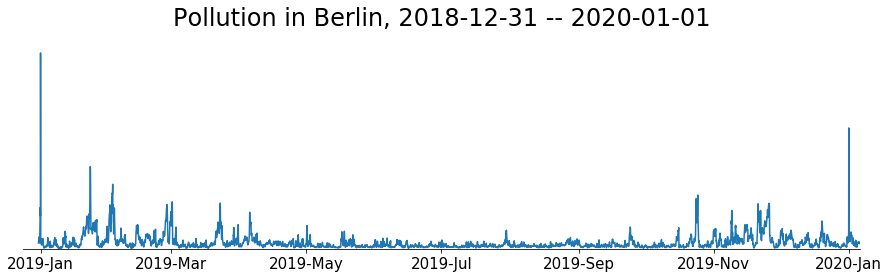

In [33]:
fig, ax = plt.subplots(figsize = (15,4));

sns.lineplot(data = agg,
                 x="date_time",
                 y="mean",
                 ax=ax);

ax.tick_params(axis='x', which='major', labelsize=15)

ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.spines["left"].set_visible(False);


ax.set(title = "Median",
                xlabel = "",
                ylabel = "",
                ylim=[0,500],
                xlim = [pd.to_datetime("2018-12-24 00:00:00"),
                        pd.to_datetime("2020-01-06 00:00:00")]);



plt.title("Pollution in Berlin, 2018-12-31 -- 2020-01-01", fontsize=24);

locs, labels = plt.xticks();
plt.xticks(locs, ("2019-Jan","2019-Mar","2019-May","2019-Jul","2019-Sep","2019-Nov","2020-Jan"));

plt.yticks([],[],visible=False);



### Plot median

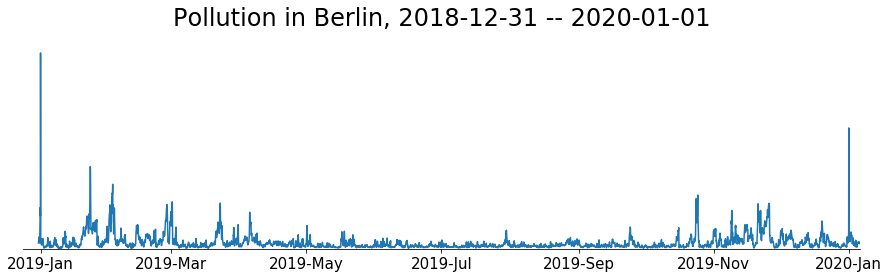

In [34]:
fig, ax = plt.subplots(figsize = (15,4));

sns.lineplot(data = agg,
                 x="date_time",
                 y="median",
                 ax=ax);

ax.tick_params(axis='x', which='major', labelsize=15)

ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.spines["left"].set_visible(False);


ax.set(title = "Median",
                xlabel = "",
                ylabel = "",
                ylim=[0,500],
                xlim = [pd.to_datetime("2018-12-24 00:00:00"),
                        pd.to_datetime("2020-01-06 00:00:00")]);



plt.title("Pollution in Berlin, 2018-12-31 -- 2020-01-01", fontsize=24);

locs, labels = plt.xticks();
plt.xticks(locs, ("2019-Jan","2019-Mar","2019-May","2019-Jul","2019-Sep","2019-Nov","2020-Jan"));

plt.yticks([],[],visible=False);

plt.savefig("presentation/berlin-1year.png")